In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 0. MNIST data

# A-F

In [22]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# 60000 images of 28x28 pixels
# 10000 images of 28x28 pixels
# total images = 70000
# if the images were colored the shape would be this: (60000, 28, 28, 3)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(f"Highest and lowest values for X_train & X_test: {X_train.min(), X_train.max(), X_test.min(), X_test.max()}")
print(f"Highest and lowest values for y_train & y_test: {y_train.min(), y_train.max(), y_test.min(), y_test.max()}")

# These values represent the pixel values for each image.

Highest and lowest values for X_train & X_test: (0, 255, 0, 255)
Highest and lowest values for y_train & y_test: (0, 9, 0, 9)


In [4]:
list_of_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# printing for-loop to better understand how it works
for i, axi in enumerate(list_of_names):
    print(i, axi)

0 zero
1 one
2 two
3 three
4 four
5 five
6 six
7 seven
8 eight
9 nine


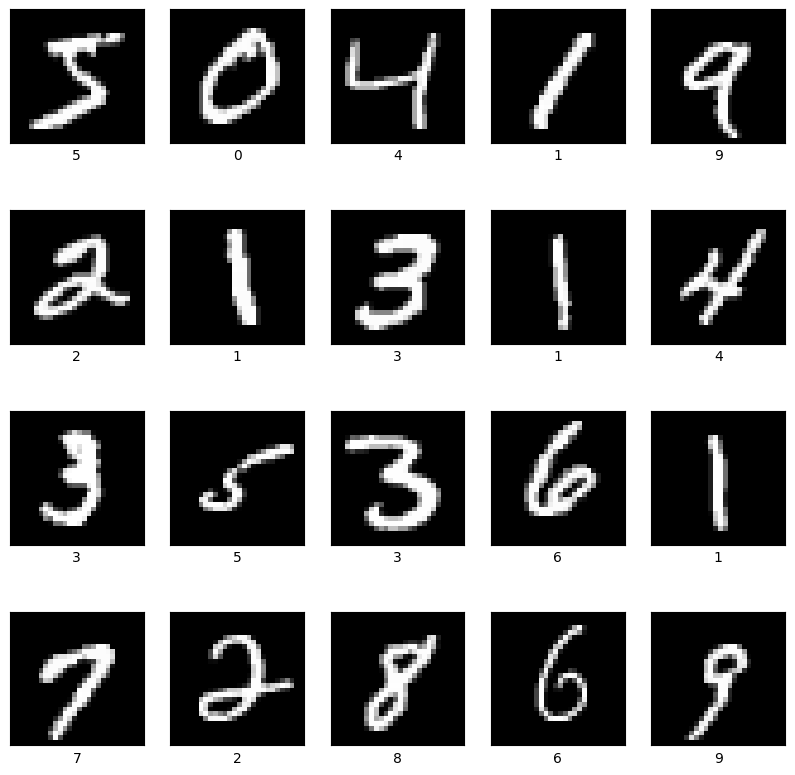

In [5]:
# plot 20 sample images

fig, ax = plt.subplots(4, 5, figsize=(10, 10)) # 4x5 matrix of images
for i, axi in enumerate(ax.flat): # flat is used to flatten the 4x5 matrix into a 1D array
    axi.imshow(X_train[i], cmap="gray") # cmap= is used to set the color map
    axi.set(xticks=[], yticks=[], xlabel=y_train[i]) # xticks and yticks are used to remove the pixelcount from x and y axis

# plt.imshow is used to plot the image from our dataset
# enumerate is used to get the index and the value of the image

In [6]:
for i in range(10):
    print(f"Number of {i}'s in the training set: {np.sum(y_train == i)}")

Number of 0's in the training set: 5923
Number of 1's in the training set: 6742
Number of 2's in the training set: 5958
Number of 3's in the training set: 6131
Number of 4's in the training set: 5842
Number of 5's in the training set: 5421
Number of 6's in the training set: 5918
Number of 7's in the training set: 6265
Number of 8's in the training set: 5851
Number of 9's in the training set: 5949


In [7]:
for i in range(10):
    print(i//5, i%5) # how we can get correct row and column for the subplot

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


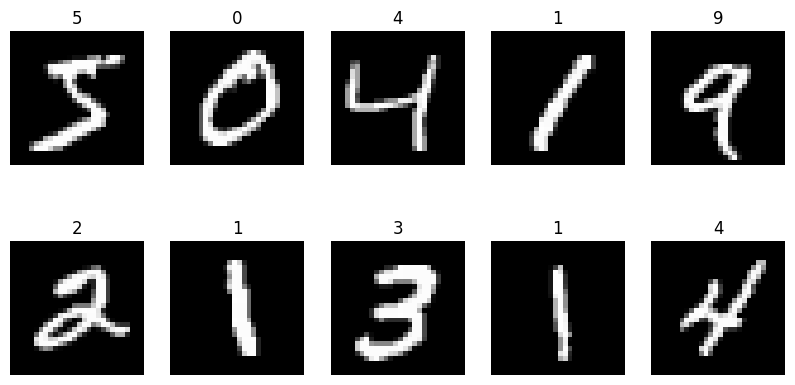

In [8]:
# Plot the first 10 images in the training set and their labels

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    # i//5 is used to get the correct row
    # i%5 is used to get the correct column
    # i is used to get the correct image
    ax[i//5, i%5].imshow(X_train[i], cmap='gray') # cmap= is used to set the color map
    ax[i//5, i%5].set_title(y_train[i]) # title
    ax[i//5, i%5].axis('off') # axis off is used to remove the pixelcount from x and y axis


In [23]:
# reshape the data to 2D from 3D

# removes 1 dimension from the array and replaces it with the number in the ()
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# 1. Train|test|val split

In [10]:
# do a plit on the training data to get validation data

# 0.16666 is used to get a perfect 10k samples for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 784), (10000, 784), (50000,), (10000,))

# 2. Hyperparameter tuning

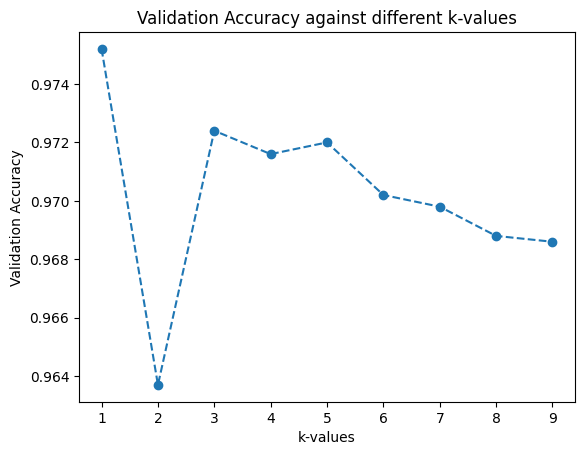

In [11]:
# tested on up to 100 neighbors jumping to every third number, completely useless, and takes alot of time

from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range(1, 10)]

# create a list to store the validation accuracy for each k-value
val_acc_list = []
# create a for-loop to iterate over the k-values
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k) # create a model
    model.fit(X_train, y_train) # fit the model
    val_acc = model.score(X_val, y_val) # get the validation accuracy
    val_acc_list.append(val_acc) # append the validation accuracy to the list

# plot the validation accuracy against different k-values

plt.plot(k_values, val_acc_list, "o--")
plt.xlabel('k-values')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy against different k-values')
plt.show()

# How could the validation accuracy be highest at k=1?
# What is the best k-value for this model? 3? 5?


# 3. Train and predict

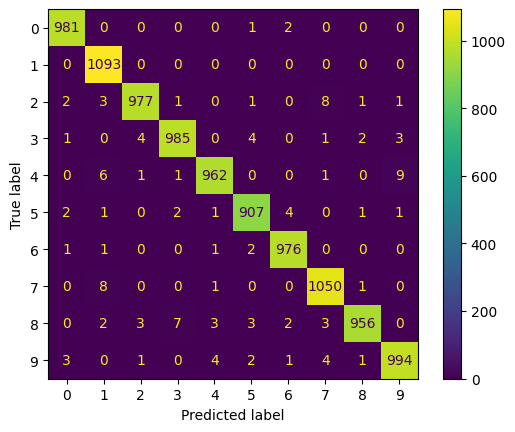

In [34]:
# scale the data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# We start with 3 first
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

# get the predictions
y_pred = model.predict(X_val_scaled)

# get the confusion matrix
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

- Why does k=1 have 1.0 accuracy?

In [35]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       984
           1       0.98      1.00      0.99      1093
           2       0.99      0.98      0.99       994
           3       0.99      0.98      0.99      1000
           4       0.99      0.98      0.99       980
           5       0.99      0.99      0.99       919
           6       0.99      0.99      0.99       981
           7       0.98      0.99      0.99      1060
           8       0.99      0.98      0.99       979
           9       0.99      0.98      0.99      1010

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
# get the accuracy score
accuracy_score(y_val, y_pred)

0.9825

In [70]:
test_list = []

for i in range(10):
    print(f"Number of {i}'s that were missclassified: {np.sum(y_val[y_pred != y_val] == i)}")
    test_list.append(np.sum(y_val[y_pred != y_val] == i))

Number of 0's that were missclassified: 3
Number of 1's that were missclassified: 0
Number of 2's that were missclassified: 17
Number of 3's that were missclassified: 15
Number of 4's that were missclassified: 18
Number of 5's that were missclassified: 12
Number of 6's that were missclassified: 5
Number of 7's that were missclassified: 10
Number of 8's that were missclassified: 23
Number of 9's that were missclassified: 16


In [73]:
sum(test_list)

119

# 4. Predict your own handwriting